### Preliminary Exploratory Data Analysis# What makes a Champion?
## DSCI 100 Group 15 Project Proposal

Arimoto, Yuhei - 36561967 | 
Dufour-Nogueira, Emma Héloïse - 34570614 | 
Huang, Felix - 15914948 | 
Tan Palanca, Katrina Marie (Kim) - 98857568

### Introduction

The dataset "atp2017-2019.csv" is a compilation of the datasets “atp_matches_2017.csv”, “atp_matches_2018.csv”, and “atp_matches_2019.csv” created by Jeff Sackman (and stored in his GitHub repository (Sackmann, 2015)). It is the primary data to be manipulated in this project. The file is a collection of information pertaining to the tournament games played by the top 500 tennis players between 2017 and 2019. This includes tournament-specific details, winning-player-specific information, losing-player-specific information, match-specific information, and serving-specific information.

In tennis, serving refers to “an action […] by which a player hits the ball to his opponent […] to begin the rally, the point, the game” (Serve-tennis, n.d.) and is widely considered to be one of the most important interactions in the game (Cazzaro, 2020). This project was conceived with the intention of quantitatively assessing the validity of this belief through the following predictive question:

How likely is a tennis player to win a tennis game based on their serving ability?

For reasons specified below (in the Methods section of this report), a K-Nearest Neighbours Regression (KNNR) approach will be employed to answer the question above.
Subsequently, only variables in the data directly related to the serving ability of winning players are explored:
- _winner_name_: name of winning players;
- _loser_name_: name of losing players;
- _w__ace_: number of aces ("a serve that successfully lands in the service box and does not touch the receiving player’s racquet" (Crim, n.d.)) executed by winning player;
- _w__df_: number of double faults ("two consecutive serving [mistakes] that result in the loss of a point" (double fault, n.d.)) carried out by winning player;
- _w__svpt_: number of points winners earned by serving (such serves will hereafter be referred to as "successful serves");
- _w__SvGms_: number of service games ("a game in which a particular player serves" (Farlex Trivia Dictionary, 2012)) won by player;
- _w__1stIn_: number of first serves executed by winning player;
- _w__1stWon_: number of successful first serves executed by winning player.

_w__2ndWon_ (number of second serves executed by winning player) was not kept due to the fact that a successful second serve has nebulous implications in regards to serving (i.e., the player may have gotten lucky).


### Methods & Results

#### What is KNNR?

Used widely in statistics, the K-Nearest Neighbors (KNN) method is a supervised machine learning algorithm: it “relies on labeled input data to learn a function that produces an appropriate output when given new unlabeled data” (Harrison, 2018).

The KNN method relies the proximity of K nearby data points (where K is a positive, whole integer) to determine the value of a new data point. The former are referred to as predictor variables (or predictors) while the latter is referred to as the response variable. In the case of this project, the predictors are the serving-related variables and the response variable is the percentage chance of a player winning a match.

There exist two types of statistical problems that make use of KNN: classification and regression. They differ by the process in which the output is calculated: in classification, the output is qualitative; in regression, the output is quantitative. Given the previously explained objectives of this project, regression is intuitively the appropriate method. Linear regression is also a candidate algorithm to be employed for quantitative data. However, as seen in the visualizations below, the non-linear patterns within the data suggest that KNNR is more appropriate given its adaptability.

KNNR involves many steps such as splitting the data, scaling the data, etc. These steps are narrated and explained below.

#### Tidying

##### Importing Relevant Libraries

The data must first be read into R and tidied according to our needs: libraries containing functions that we can use to treat the data must first be imported into R. Each library offers its own unique set of functions. A seed must also be established: this is a random number generator that produces a pre-determined sequence of numbers, causing the code below it to be reproducible on other machines.

In [49]:
library(tidyverse)
library(tidymodels)
library(GGally)

set.seed(1234)

#this library() function loads the tidymodels, tidyverse, and GGally libraries into R
#the set.seed() function sets the seed for the project

##### Reading the Data from the Web into R

The data can be read from the web directly into R using the _tidyverse read_csv()_ function. In this case, the data is stored in an online GitHub repository created for this project.

In [50]:
data <- read_csv("https://raw.githubusercontent.com/kimtanpalanca/dsci_group_15/main/atp2017-2019.csv")
#the tennnis player data is referred to as the object "data" throughout this analysis

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  tourney_id = col_character(),
  tourney_name = col_character(),
  surface = col_character(),
  tourney_level = col_character(),
  winner_seed = col_character(),
  winner_entry = col_character(),
  winner_name = col_character(),
  winner_hand = col_character(),
  winner_ioc = col_character(),
  loser_seed = col_character(),
  loser_entry = col_character(),
  loser_name = col_character(),
  loser_hand = col_character(),
  loser_ioc = col_character(),
  score = col_character(),
  round = col_character()
)

See spec(...) for full column specifications.



##### Selecting and Tidying Relevant Columns

The relevant variables specified above are extracted from the dataset (using the _tidyverse select()_ function) while also eliminating NA values ("non-applicable") from each variable so as to ensure the quantitative nature of the data using the _tidyverse filter()_ function.

In [51]:
data <- data%>%
    select(winner_name,
           w_ace,
           w_df, 
           w_svpt, 
           w_SvGms, 
           w_1stIn, 
           w_1stWon, 
           loser_name)%>%
#the columns relevant to our analysis are selected using this select() function
    filter(!is.na(winner_name),
           !is.na(loser_name),
           !is.na(w_ace),
           !is.na(w_df),
           !is.na(w_svpt),
           !is.na(w_SvGms),
           !is.na(w_1stIn),
           !is.na(w_1stWon))
#the !is.na() argument in the filter() function eliminates NA values in the relevant columns

head(data, 10)

winner_name,w_ace,w_df,w_svpt,w_SvGms,w_1stIn,w_1stWon,loser_name
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Kei Nishikori,3,3,77,13,44,31,Daniil Medvedev
Daniil Medvedev,10,1,52,10,33,28,Jo Wilfried Tsonga
Kei Nishikori,2,2,47,8,33,26,Jeremy Chardy
Jo Wilfried Tsonga,12,2,68,11,43,34,Alex De Minaur
Daniil Medvedev,12,3,105,16,68,48,Milos Raonic
Jeremy Chardy,10,8,94,16,58,44,Yasutaka Uchiyama
Kei Nishikori,5,2,59,12,47,37,Grigor Dimitrov
Jo Wilfried Tsonga,11,3,64,10,37,30,Taro Daniel
Alex De Minaur,1,1,49,9,38,29,Jordan Thompson


##### Table 1: First 10 Rows of the _data_ Tibble

##### Gathering the Winner Data

The code below calculates the response value for each winning player through the following steps:

   1) _player_data_ gathers _winner_name_ and _loser_name_ in a single tibble;
   
   2) _player_data_column_ combines these into a single column;
   
   3) _winner_names_ extracts only the _winner_name_ column from _player_data_ and, using the _tidyverse summarize()_ function, creates a column containing the frequency of each player name (i.e. the number of times each player has won);
   
   4) similarly, _n__games_all_ adds a column to _player_data_column_ containing the frequency of each player name (i.e., the total number of games played by each player). It then extracts only the rows containing player names present in _winner_names_;
   
   5) _winner_data_ combines the _winner_name, n__wins_ (number of wins), and _n__games_ (total games played) columns through which the win probability for each winner is calculated and gathered in the _percentage_win_ column using the following formula:  
   
   $\frac{Number~of~Wins~Earned}{Total~Number~of~Games~Played}*100$

In [52]:
player_data <- data%>%
    select(winner_name, 
           loser_name)
#this code creates a dataframe containing all of the players' names in the original data (both winners and losers)
#the frequency of repetition of these names is equivalent to the number of matches that each player partook in
#(e.g. player X appears twice, he took part in 2 matches)

player_data_column <- data.frame(all_players=unlist(player_data, use.names = FALSE))
#this code creates a single column containing all of the players names

winner_names <- player_data%>%
    group_by(winner_name)%>%
    summarize(n_wins = n())
#this code creates a table containing only the winners names as well as the number of wins of each winning player

n_games_all <- player_data_column%>%
    group_by(all_players)%>%
    summarize(n_games = n())%>%
    subset(all_players %in% winner_names$winner_name)
#this code adds a column to player_data_column containing the number of games each player partook in
#it then extracts the rows which contain player names present in winner_names (i.e. restricts the data to only winners)

winner_data <- tibble(winner_name = winner_names$winner_name,
                      n_wins = winner_names$n_wins, 
                      n_games = n_games_all$n_games)%>%
    mutate(percentage_win = (n_wins/n_games)*100)
#this code creates a tibble containing the winners' names, their number of matches won, and the total number of matches they partook in
#the mutate() function then adds a column detailing the win ratios of each winner in relation to their total number of matches played in (win/total)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



##### Tidying the Data as a Whole

To create a dataset that a KNNR classifier can be applied to, the mean of each variable in the data must first be calculated to eliminate recurring player names (resulting from the data spanning three years). Name repeats are also removed by summarizing the frequency values of each name in a separate column to be excluded later (_number_of_wins_). Thus:
- _avg_ace_: average number of aces of winning player;
- _avg_df_: average number of double faults by winning player;
- _avg_svpt_: average number of service points earned by winning player;
- _avg_svgm_: average number of service games won by player;
- _avg_first_: average number of first serves executed by winning player;
- _avg_first_won_: average number of successful first serves by winning player.

Furthermore, given that both _avg_svpt_ and _avg_svgm_ refer to points earned by serving, the total number of serving points is given by their sum, gathered in the total_avg_svpt column. Similarly, the _avg_first_ and _avg_first_won_ variables can be used to create the _fst_srv_prct_ column using the _tidyverse mutate()_ function: the percentage of successful first serves.

Once _winner_data_ is combined with the main data table, relevant variables are rounded to two decimal places (using the _round()_ function) and, to eliminate outliers, the data is filtered for winners who played at least 50 games over the three years.

Using the select() function, the tidied data now consists of the following quantitative columns:
- _percentage_win_;
- _avg_ace_;
- _avg_df_;
- _total_avg_svpt_;
- _fst_srv_prct_.

In [53]:
data <- data%>%
    group_by(winner_name)%>%
    summarize(number_of_wins = n(),
              avg_ace = mean(w_ace),
              avg_df = mean(w_df),
              avg_svpt = mean(w_svpt),
              avg_svgm = mean(w_SvGms),
              avg_first = mean(w_1stIn),
              avg_first_won = mean(w_1stWon))%>%
#removing repeats in data by averaging all the values over three years
    mutate(total_avg_svpt = avg_svpt + avg_svgm,
#summing service points and service games (both are points earned by serving)
           fst_srv_prct = (avg_first_won/avg_first)*100)%>%
#calculating the percentage of successful first serves
    bind_cols(winner_data)%>%
#combining the relevant columns in winner_data with the data dataframe
    mutate(avg_ace = round(avg_ace, 2),
           avg_df = round(avg_df, 2), 
           total_avg_svpt = round(total_avg_svpt, 2), 
           fst_srv_prct = round(fst_srv_prct, 2),
           percentage_win = round(percentage_win, 2))%>%
#rounding to 2 decimal places
    filter(n_games > 50)%>%
#filtering for winners who play at least 50 games in order to eliminate outliers
    select(percentage_win,
           avg_ace, 
           avg_df, 
           total_avg_svpt, 
           fst_srv_prct)
#selecting relevant variables

head(data, 10)

`summarise()` ungrouping output (override with `.groups` argument)

New names:
* winner_name -> winner_name...1
* winner_name -> winner_name...11



percentage_win,avg_ace,avg_df,total_avg_svpt,fst_srv_prct
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
51.27,6.02,2.27,92.95,73.35
47.06,3.97,2.32,96.43,71.86
59.26,4.58,2.41,89.00,75.87
69.35,9.06,3.48,88.41,77.35
50.98,9.31,2.17,90.87,78.18
49.56,7.25,2.73,97.30,76.72
55.00,6.70,3.39,91.45,76.13
63.16,7.22,2.89,99.75,74.95
51.90,10.17,5.11,94.68,79.38


##### Table 2: First 10 Rows of the _data_ Tibble (_percentage_win_: percentage of wins earned by winning player; _avg_ace_: average number of aces scored by winning player; _avg_df_: average number of double faults scored by winning player; _total_avg_svpt_: average total number of successful serves by winning player; _fst_srv_prct_: percentage of successful first serves by winning player)

#### Exploration and Visualization

##### Splitting the Data into Training and Testing Sets

In [54]:
data_split <- initial_split(data, prop = 0.75, strata = percentage_win)
data_train <- training(data_split)
data_test <- testing(data_split)

#randomly splits 75% of the data into the training and testing sets using
#percentage_win as the strata

The first step in KNNR is to split the data into training and testing data: the former is used to build the prediction algorithm while the latter is what the classifier will be predicting on. 

##### Summarizing Key Details of the Training Data

Before building the KNNR model, understanding key details of the data is needed to evaluate how the data should be analyzed through the summary table below. This includes information that may influence the classifier accuracy (e.g., the size of the data).

In [55]:
train_summmary <- data_train%>%
    tibble(number_of_players = nrow(data_train),                                                   #total number of winners in the data
           avg_ace_n = mean(avg_ace),                                                              #average number of aces of each winner
           avg_df_n = mean(avg_df),                                                                #average number of double faults by each winner
           avg_total_avg_svpt = mean(total_avg_svpt),                                              #average total number of points earned by serving of each winner
           avg_fst_srv_prct = mean(fst_srv_prct),                                                  #average percentage of succesful first serves of each winner
           top_win_p = max(percentage_win),                                                        #highest win ratio in the data 
           bottom_win_p = min(percentage_win))%>%                                                  #lowest win ratio in the data
    select(number_of_players, 
           avg_ace_n,
           avg_df_n, 
           avg_total_avg_svpt, 
           avg_fst_srv_prct, 
           top_win_p, 
           bottom_win_p)%>%
#the select() function keeps relevant columns
    slice(1)%>%
    mutate(number_of_players = as.double(number_of_players), 
           avg_ace_n = round(avg_ace_n, 2),
           avg_df_n = round(avg_df_n, 2), 
           avg_total_avg_svpt = round(avg_total_avg_svpt, 2), 
           avg_fst_srv_prct = round(avg_fst_srv_prct, 2))
#converting variables to appropriate data types and rounding to 2 decimal places

train_summmary

number_of_players,avg_ace_n,avg_df_n,avg_total_avg_svpt,avg_fst_srv_prct,top_win_p,bottom_win_p
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
80,7.44,2.78,93.74,76.28,88.24,29.31


##### Table 3: Summary of Key Details in the Training Data (_number_of_players_: number of winning players; _avg_ace_n_: mean of the average number of aces; _avg_df_n_: mean of the average number of double faults; _avg_total_avg_svpt_: mean of the average number of total service points; _avg_fst_srv_prct_: mean of the average percentage of successful first serves; _top_win_p_: highest win probability value; _bottom_win_p_: lowest win probability value)

##### Visualizing the Relationships Between Each Predictor and the Response Variable

In addition to the summary table above, plots of the non-linear relationships between all of the variables in the data provides some insight into why KNNR is more appropriate than linear regression (as explained above).

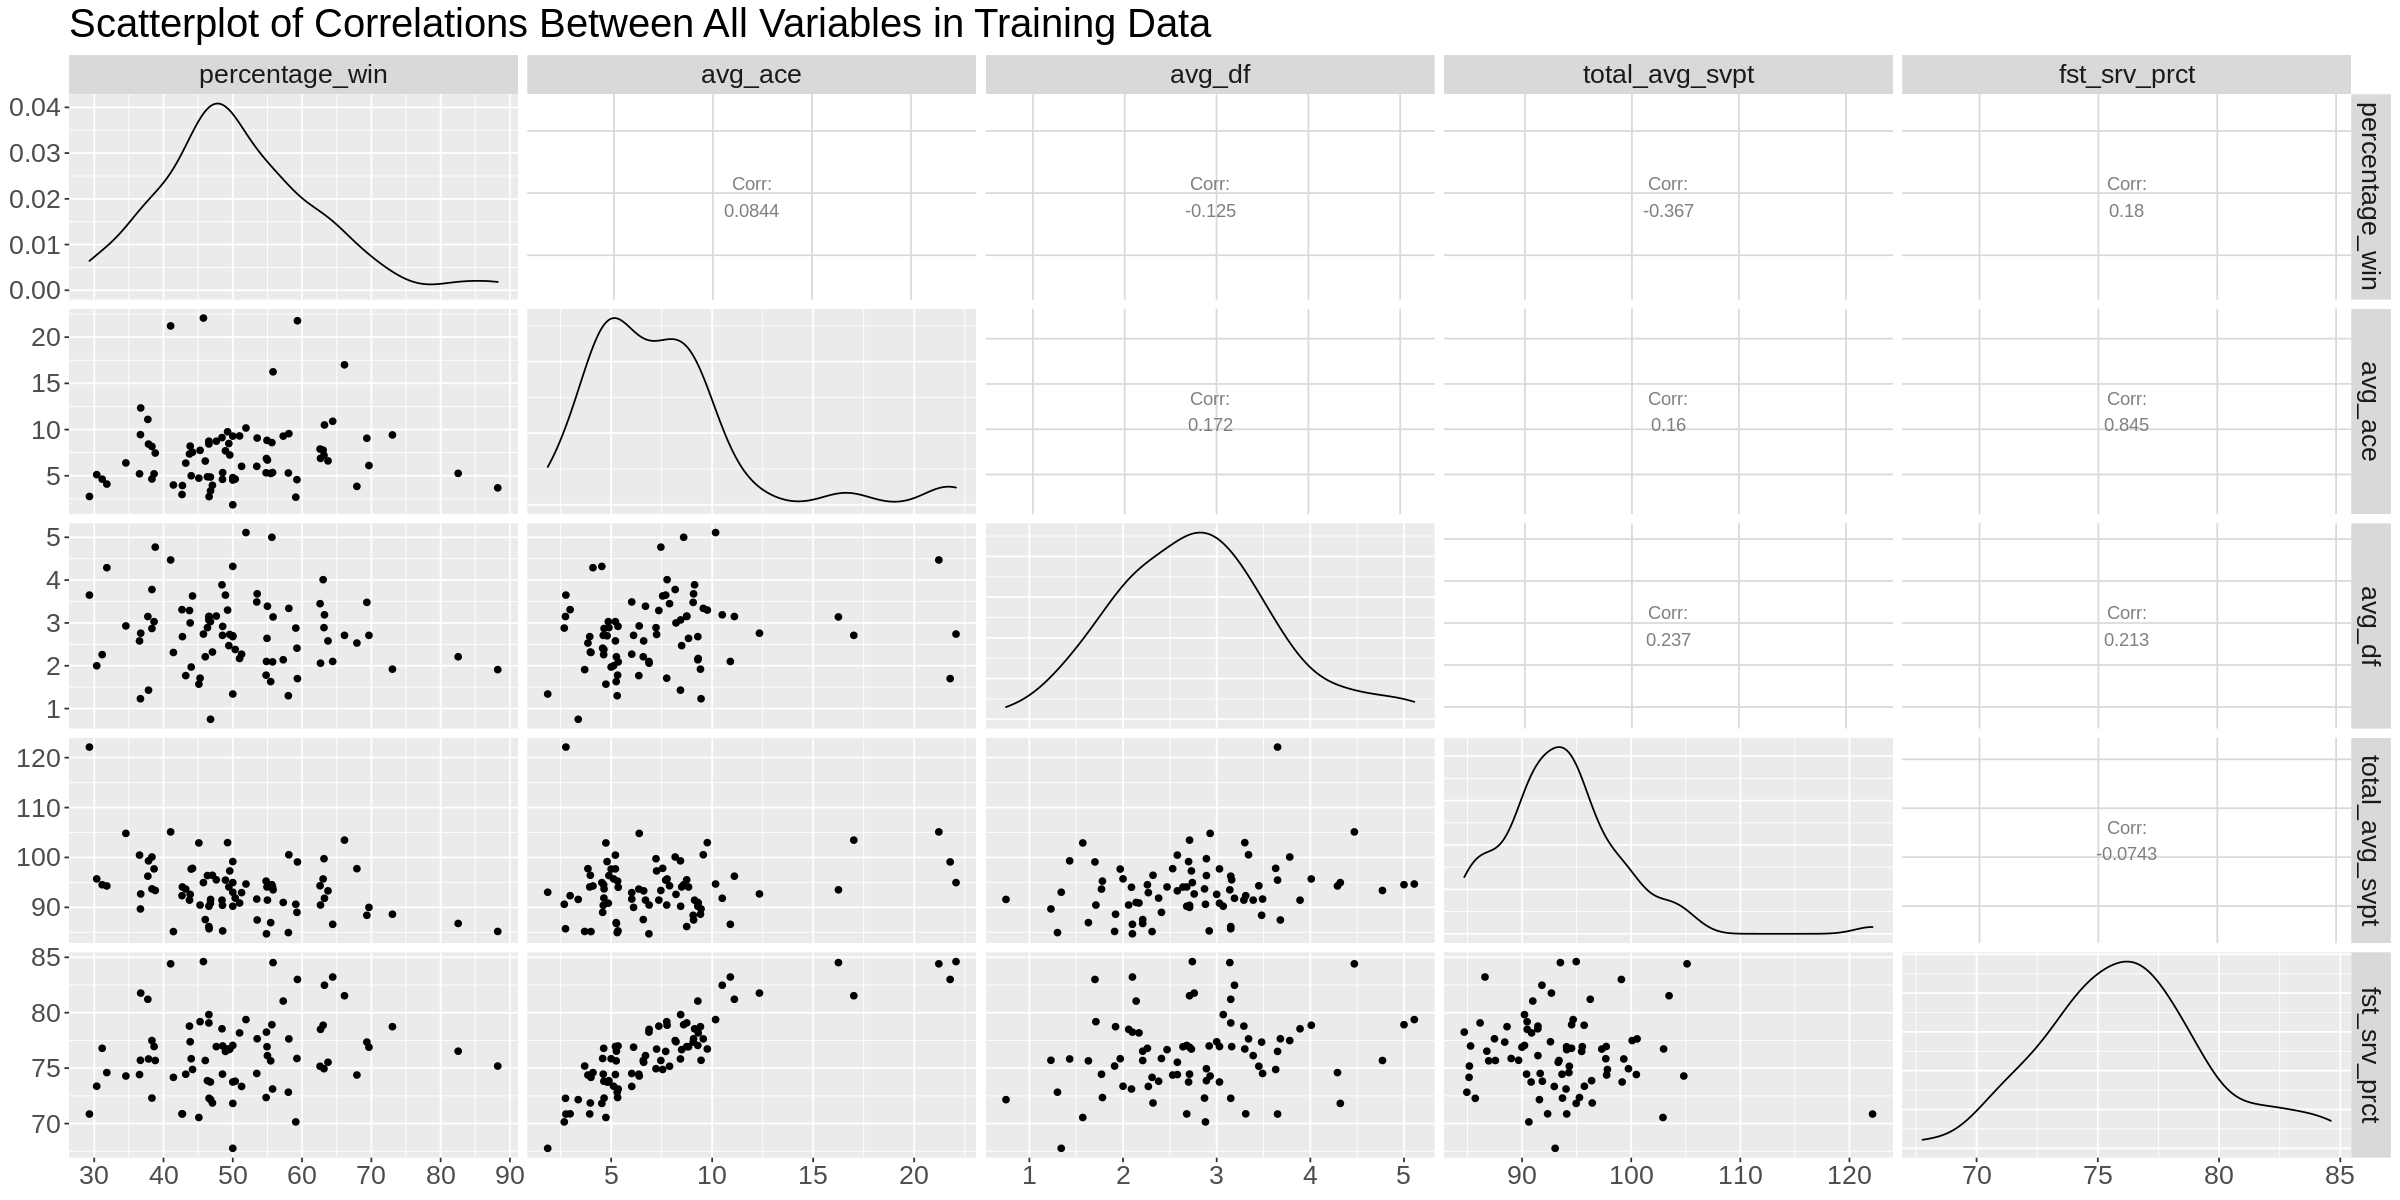

In [56]:
options(repr.plot.width = 20, repr.plot.height = 10)

relationships <- data_train %>%
    ggpairs(columns = 1:ncol(data_train), title = "Scatterplot of Correlations Between All Variables in Training Data", axisLabels = "show") +
#plotting the correlations between all variables against each other in data_train
    theme(text = element_text(size = 20))
    
relationships

##### Graph 1: Scatterplots and Associated Line Plots Between Each Predictor Variable and the Response Variable

#### Building a KNN Regression Classifier Model

##### Creating a Recipe

As previously mentioned, the distance between observations is a significant factor in KNN models. As such, predictors must be scaled and centered by creating a recipe using the training data, the _tidyverse recipe()_ function, and _percentage_win_ as the response variable.

In [71]:
recipe <- recipe(percentage_win ~ ., data = data_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

#creating a recipe
#this involves scaling and centering the predictors in the training data

##### Separating the Training Data into Validation and Training Sets

In [58]:
folds <- vfold_cv(data_train, v = 10, strata = percentage_win)

#tuning the classifier using validation sets in the training data through 10 folds

The _tidymodels vfold_cv()_ function splits the training data into _v_ folds (10 in this case) containing a training set and validation set, ensuring the correct proportions of each predictor in each fold. The validation sets are used to optimize the _K_ value.

##### Creating a Tuned Regression Model

In [59]:
model <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("regression")

#creating a predictive KNN regression model

A tuned KNNR model is built: the number of neighbours is not specified. Rather, the _tidymodels tune()_ function will instruct the classifier to iterate the model over multiple  possible _K_ values.

##### Fitting a Workflow

To execute the preparation above, the _tidymodels workflow()_ function is used to apply the classifier to the scaled and centered folds with _K_ spanning from 1 to 100. The _tidymodels collect_metrics()_ function (coupled with the _tidyverse arrange()_ and _slice()_ functions) summarizes the _K_ value associated with the lowest RMSPE value (a measure of how well the model predicts on data it was not trained with). This _K_ value is extracted below using the _tidyverse pull()_ function.

In [60]:
rmspe <- workflow() %>%
    add_recipe(recipe) %>%
    add_model(model) %>%
    tune_grid(
        resamples = folds, 
        grid = 100) %>%
    collect_metrics() %>%
    filter(.metric == "rmse") %>%
    arrange(mean) %>%
    slice(1) 
rmspe

#calculating the RMSPE value (prediction accuracy) of the KNN model on the validation set

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
14,rmse,standard,10.69662,10,0.5627384,Model14


##### Table 4: Summary of the Model's Accuracy on the Validation Set (RMSPE) and Associated Number of Neighbours (14)

In [61]:
kmin <- rmspe %>%
    pull(neighbors)

#extracting the value of the K-value associated with the smallest error (i.e. smallest RMSPE)

##### Creating a New, Optimized Model using K = 14

These steps are repeated with the new _K_ value.

In [62]:
model_14 <- nearest_neighbor(
        weight_func = "rectangular", 
        neighbors = kmin) %>%
    set_engine("kknn") %>%
    set_mode("regression")

#creating a new KNN regression model using the best K-value (14)

##### Creating a New Workflow using K = 14

In [63]:
workflow <- workflow() %>%
    add_recipe(recipe) %>%
    add_model(model_14) %>%
    fit(data = data_train)

#gathering the multiple analysis steps in the workflow and fitting it using the selected K-value

##### Assessing the Value of the RMSE

By applying the optimized KNNR model to the training data, the RMSE (a measure of how well the model predicts on data it was trained with) can be calculated.

In [64]:
rmse <- workflow %>%
    predict(data_train) %>%
    bind_cols(data_train) %>%
    metrics(truth = percentage_win, estimate = .pred) %>%
    filter(.metric == "rmse")
rmse

#calculating the RMSE value (prediction accuracy) of the new KNN model on the training set

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,10.19109


##### Table 5: Summary of the Model's Accuracy on the Training Set (RMSE)

##### Applying the Model to the Testing Dataset and Calculating the RMSPE

This optimized model can then be applied to the testing data to calculate the RMSPE.

In [65]:
summary <- workflow %>%
  predict(data_test) %>%
  bind_cols(data_test) %>%
  metrics(truth = percentage_win, estimate = .pred) %>%
  filter(.metric == "rmse")
summary

##calculating the RMSPE value (prediction accuracy) of the new KNN model on the testing set

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,9.584716


##### Table 6: Summary of the Model's Accuracy on the Testing Set (RMSPE)

#### Visualizing the Results of the Analysis

##### Creating a Tibble Containing All Predictions Effectuated by the Classifier Created Above

The precision of the classifier can be assessed through visualizations. To do this, a tibble containing the original data and predicted response values is created using the _tidyverse predict()_ and _bind_cols()_ functions.

In [66]:
predictions <- workflow %>%
  predict(data_train)%>%
  bind_cols(data_train)

#creating a tibble within which predicted value are shown alongside the true value

##### Visualizing the Estimates of the KNN Regression Model Against the True Values of the Response Variable and Individual Predictor Variables

Due to the large number of predictor variables, a plot containing all five variables would be too visually complex to understand. Therefore, each of the four predictors is plotted individually as a scatterplot against the response variable (using the _tidyverse geom_point()_ function) in addition to a KNNR line pertaining to that specific predictor (using the _tidyverse geom_line()_ function).

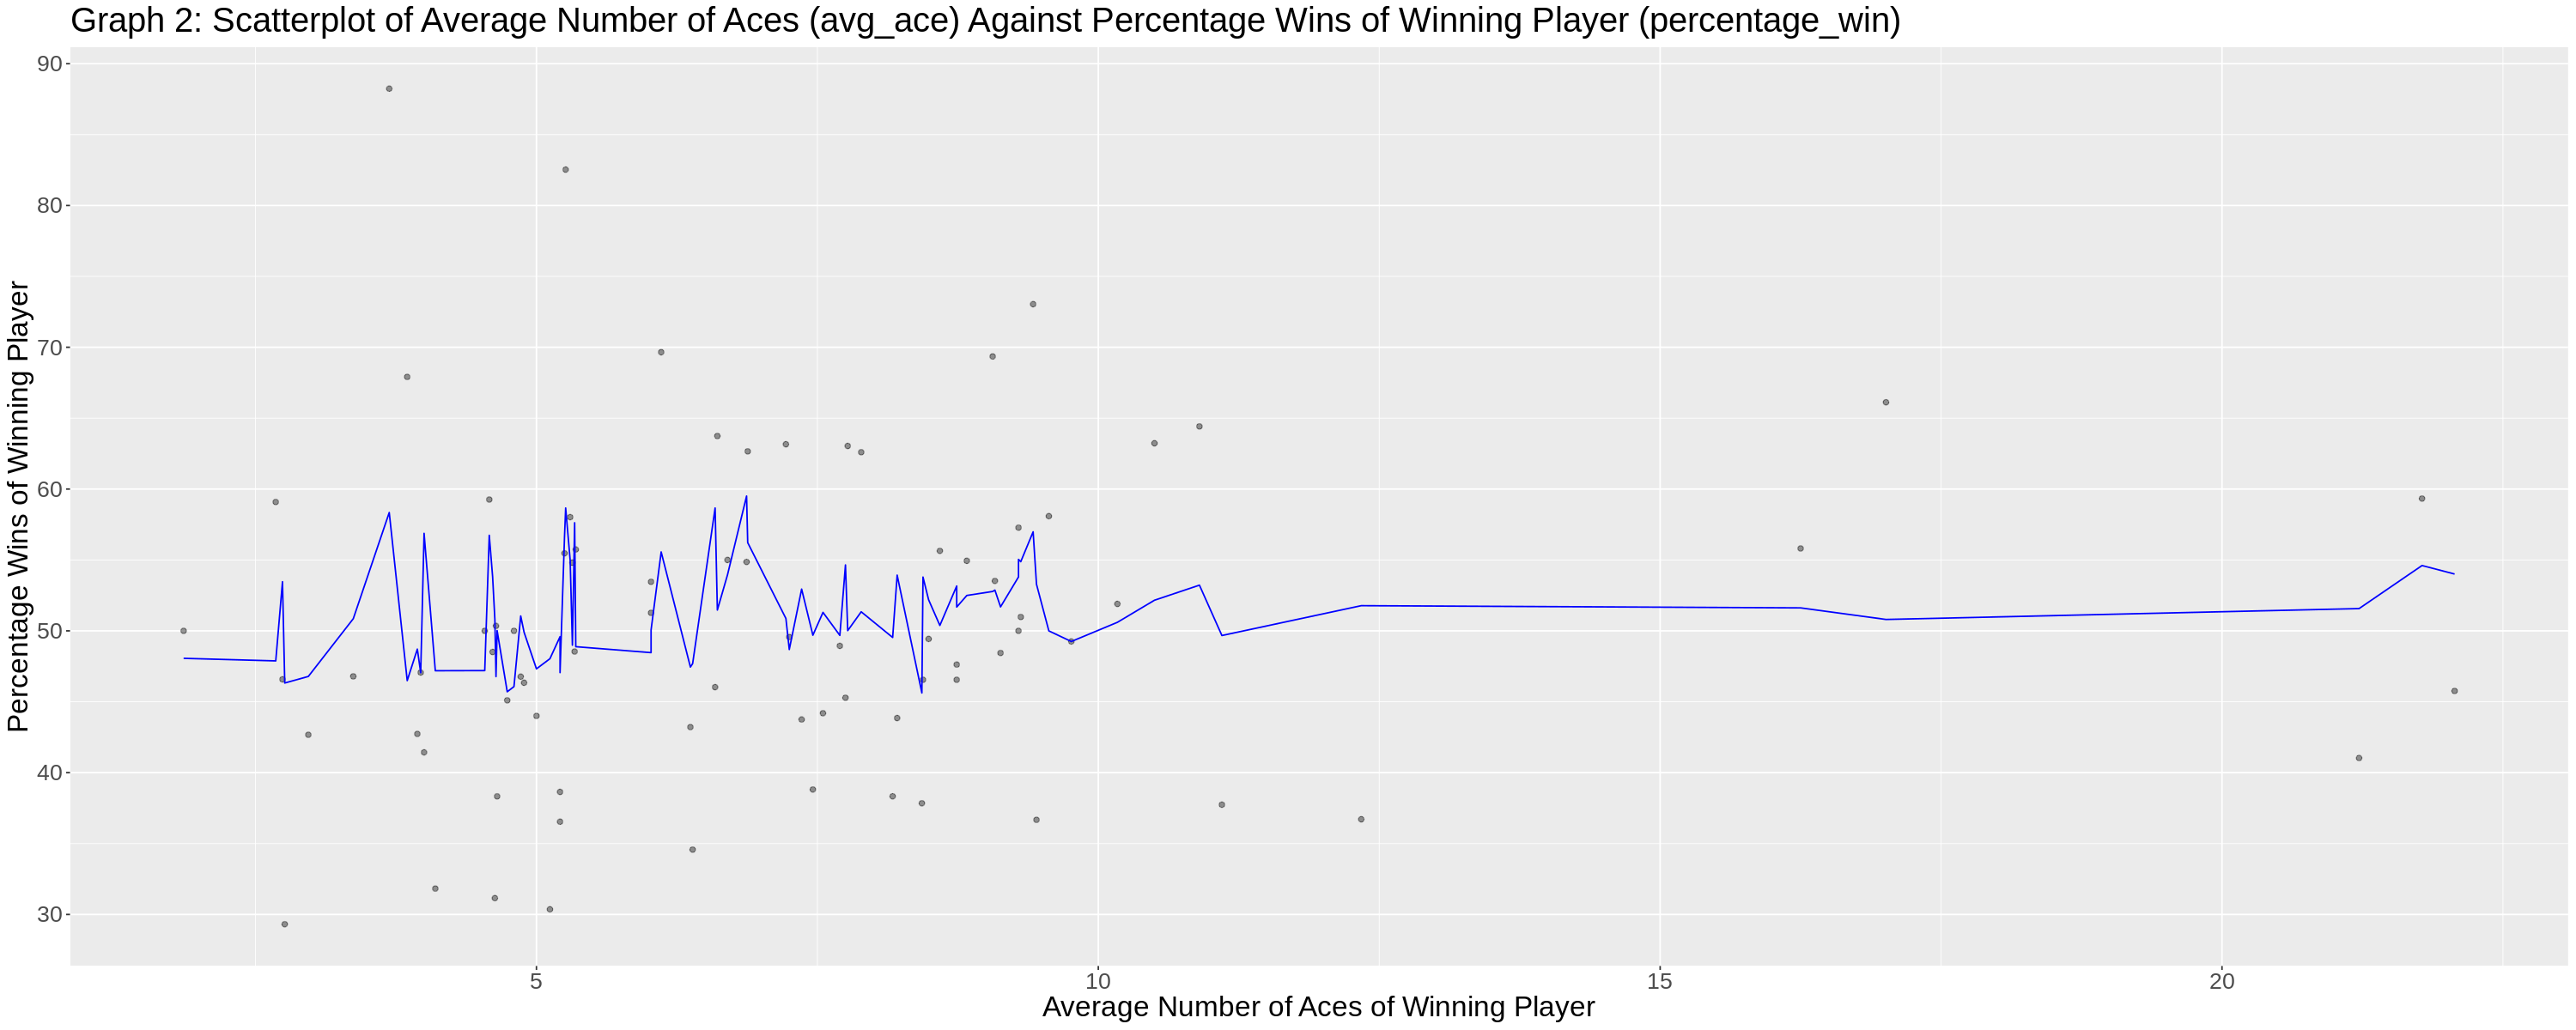

In [67]:
options(repr.plot.width = 25, repr.plot.height = 10)

ace_plot <- ggplot(predictions, aes(x = avg_ace, y = percentage_win)) +
  geom_point(alpha = 0.4) +
    xlab("Average Number of Aces of Winning Player") +
    ylab("Percentage Wins of Winning Player") +  
    geom_line(data = predictions, 
            mapping = aes(x = avg_ace, y = .pred), 
            color = "blue") +
  ggtitle("Graph 2: Scatterplot of Average Number of Aces (avg_ace) Against Percentage Wins of Winning Player (percentage_win)") +
  theme (text = element_text (size = 20))

ace_plot

#graphing each individual predictor against the response variable to evaluate the relationships between them

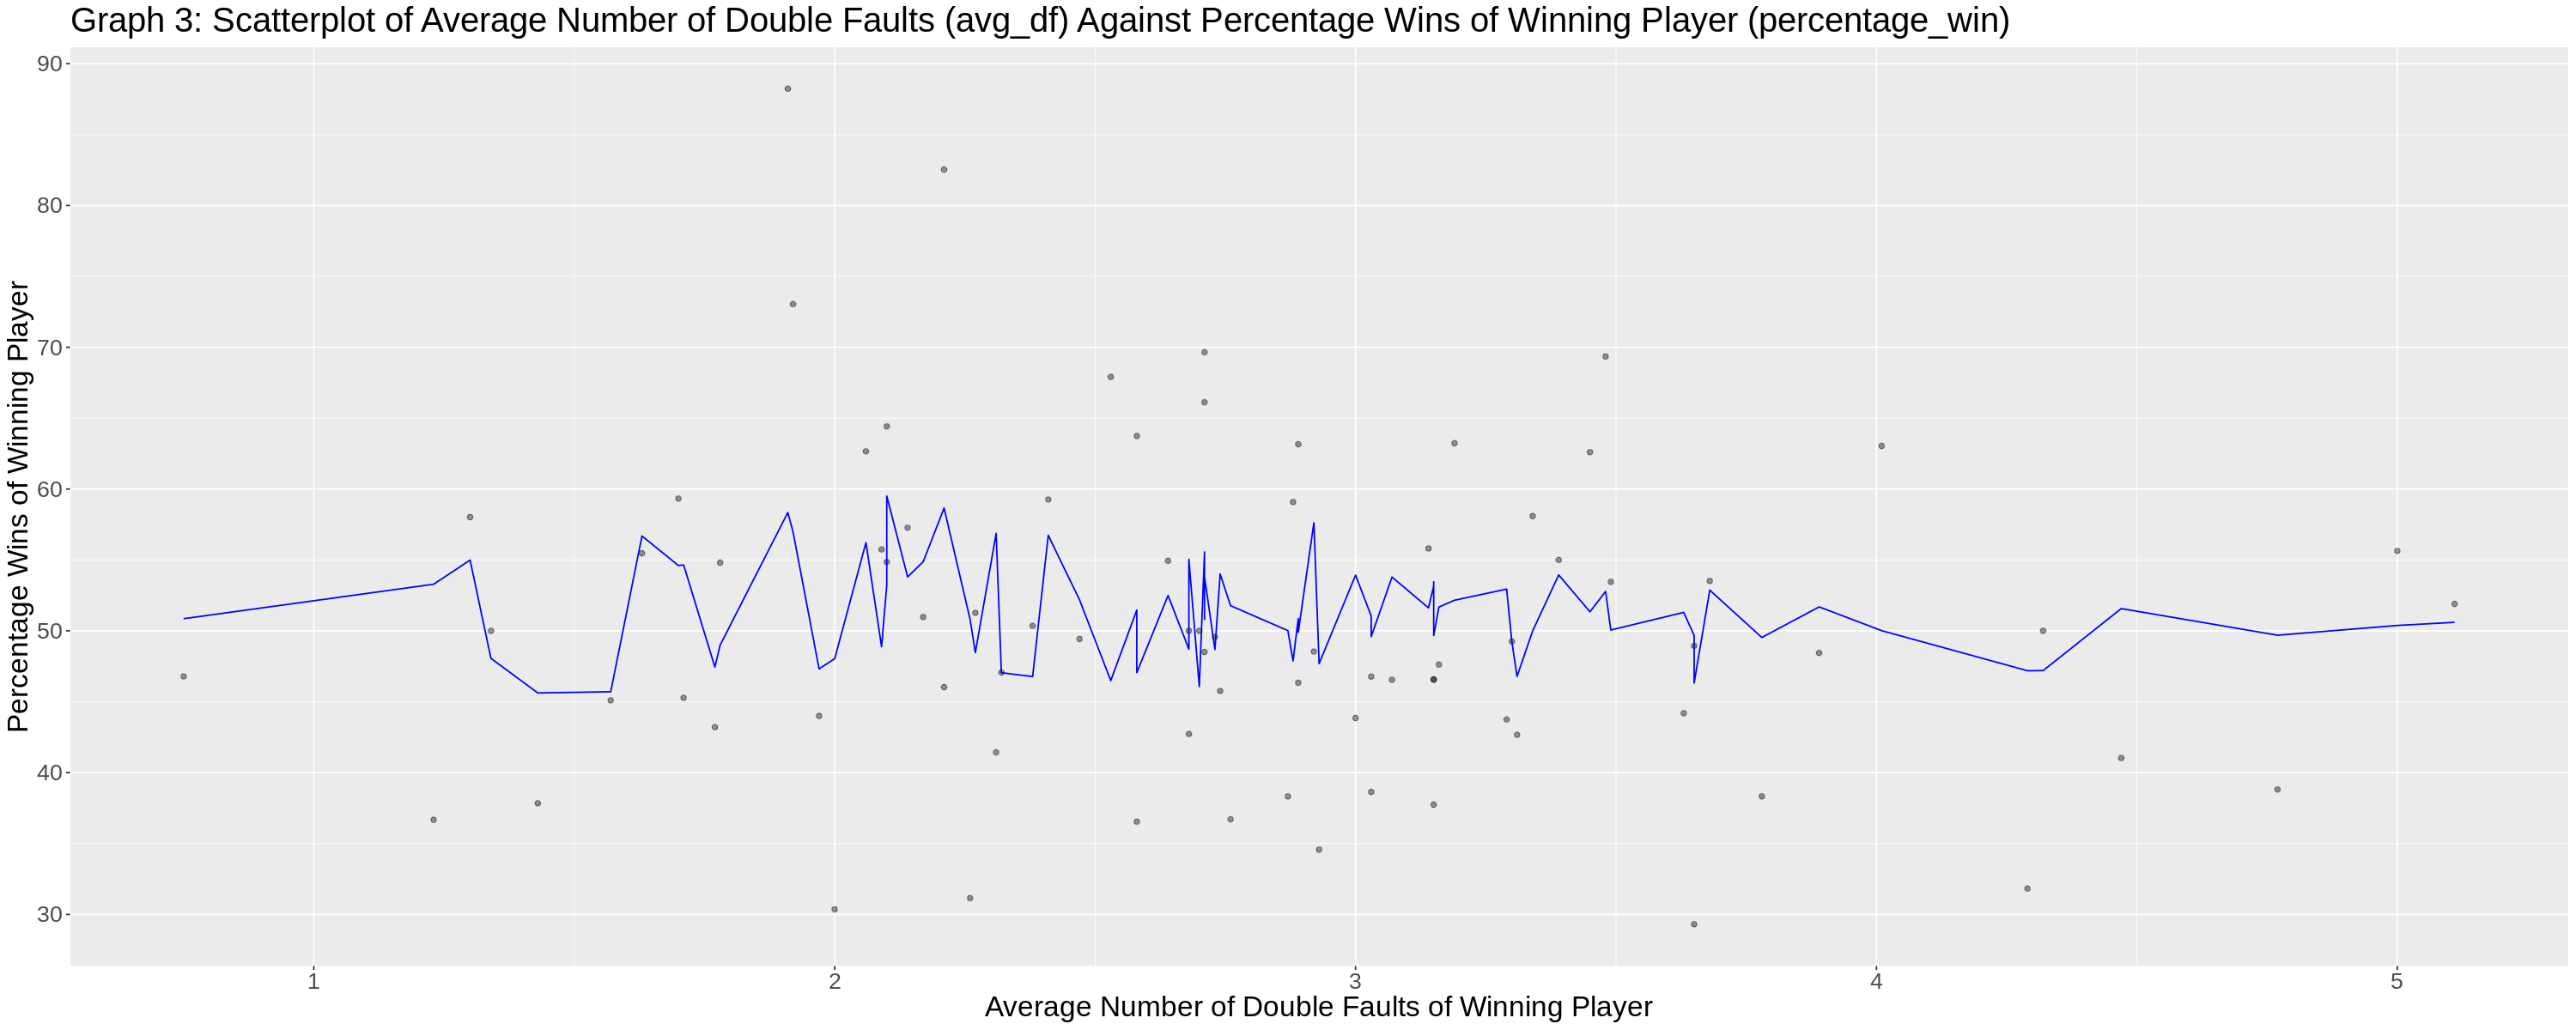

In [68]:
options(repr.plot.width = 25, repr.plot.height = 10)

df_plot <- ggplot(predictions, aes(x = avg_df, y = percentage_win)) +
  geom_point(alpha = 0.4) +
    xlab("Average Number of Double Faults of Winning Player") +
    ylab("Percentage Wins of Winning Player") +  
    geom_line(data = predictions, 
            mapping = aes(x = avg_df, y = .pred), 
            color = "blue") +
  ggtitle("Graph 3: Scatterplot of Average Number of Double Faults (avg_df) Against Percentage Wins of Winning Player (percentage_win)") +
  theme (text = element_text (size = 20))

df_plot

#graphing each individual predictor against the response variable to evaluate the relationships between them

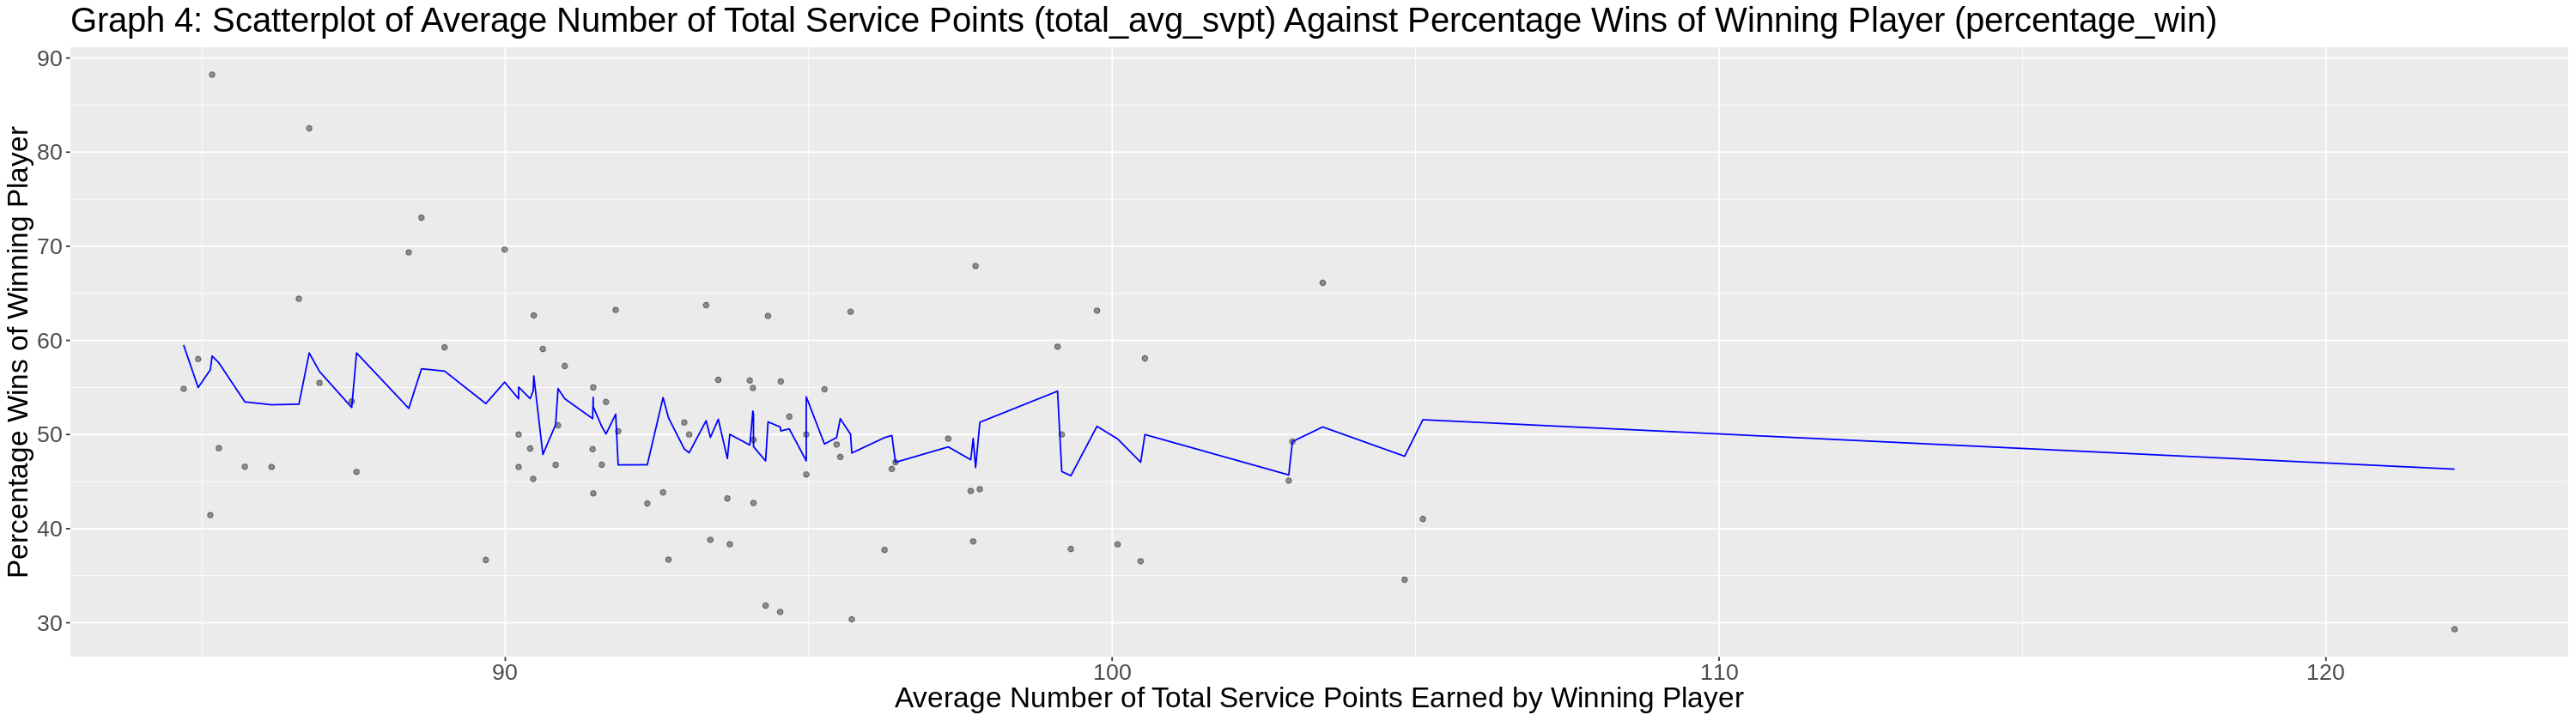

In [69]:
options(repr.plot.width = 25, repr.plot.height = 7)

svpt_plot <- ggplot(predictions, aes(x = total_avg_svpt, y = percentage_win)) +
  geom_point(alpha = 0.4) +
    xlab("Average Number of Total Service Points Earned by Winning Player") +
    ylab("Percentage Wins of Winning Player") +  
    geom_line(data = predictions, 
            mapping = aes(x = total_avg_svpt, y = .pred), 
            color = "blue") +
  ggtitle("Graph 4: Scatterplot of Average Number of Total Service Points (total_avg_svpt) Against Percentage Wins of Winning Player (percentage_win)") +
  theme (text = element_text (size = 20))

svpt_plot

#graphing each individual predictor against the response variable to evaluate the relationships between them

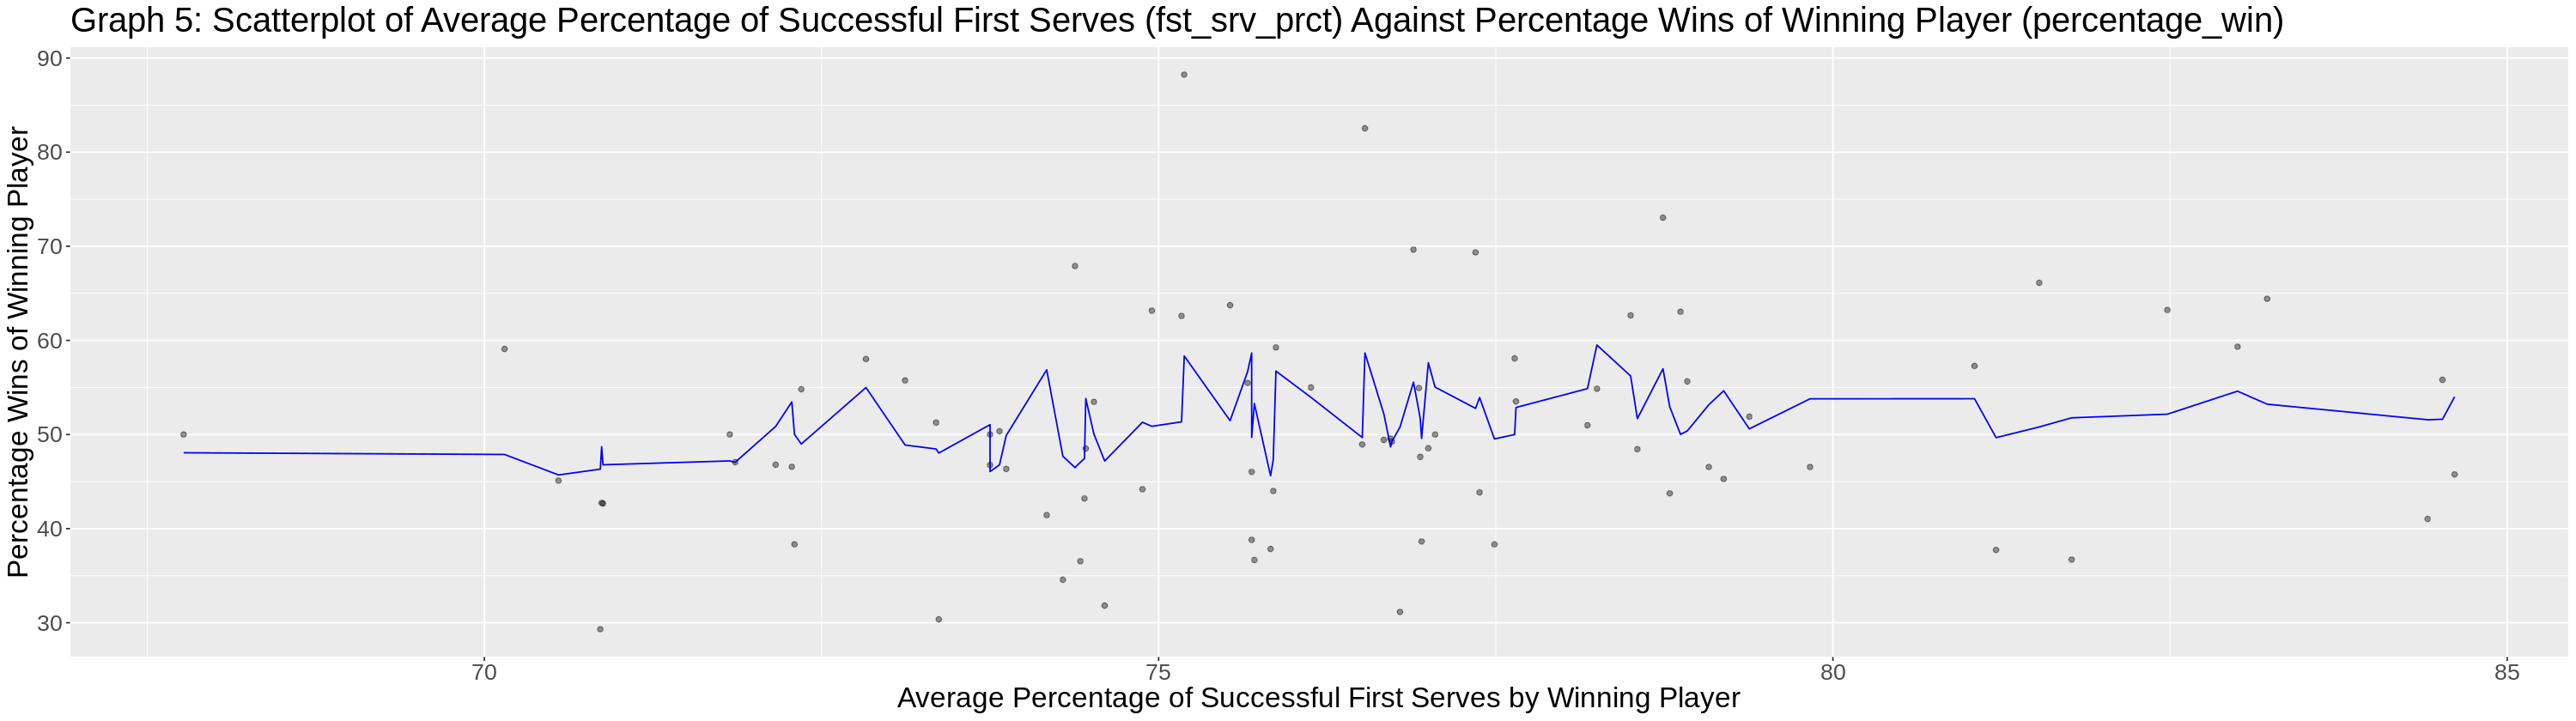

In [70]:
options(repr.plot.width = 25, repr.plot.height = 7)

win_plot <- ggplot(predictions, aes(x = fst_srv_prct, y = percentage_win)) +
  geom_point(alpha = 0.4) +
    xlab("Average Percentage of Successful First Serves by Winning Player") +
    ylab("Percentage Wins of Winning Player") +  
    geom_line(data = predictions, 
            mapping = aes(x = fst_srv_prct, y = .pred), 
            color = "blue") +
  ggtitle("Graph 5: Scatterplot of Average Percentage of Successful First Serves (fst_srv_prct) Against Percentage Wins of Winning Player (percentage_win)") +
  theme (text = element_text (size = 20))

win_plot

#graphing each individual predictor against the response variable to evaluate the relationships between them

### Discussion

- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?

### References